In [30]:
from plots import *
from matplotlib import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 5, 3

In [31]:
def one_point(start_param, sample_value, color, index=0):
    change = np.zeros(start_param.shape)
    change[-1]=-sample_value
    r = np.roots(start_param+change)
    stem_results([r[index]],[sample_value], color)

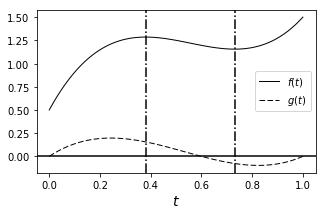

In [32]:
pylab.ion()
fig, ax = pylab.subplots()
start_param = np.array([6, -10, 5, 0.5])
# start_param = np.array([2, -1, 1])
sample_values = [0.7,1.2,1.2,1.2]
polynomial = SignalPolynomial(start_param)
plot_results(polynomial, 'k', lw=1)

changes = np.array([1, -1.6, 0.6, 0])
changes = 3*changes
plot_results(SignalPolynomial( changes), 'k', lw=1, ls='--')
ax.axhline(y=0, color='k')

rts = np.roots([18,-20,5])
for r in rts:
    ax.axvline(x=r, color='k', ls='-.')
    
pylab.legend(["$f(t)$", "$g(t)$"], loc=5)
pylab.xlabel("$t$", fontsize=14)


pylab.ioff()
pylab.show()

/Users/miska/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


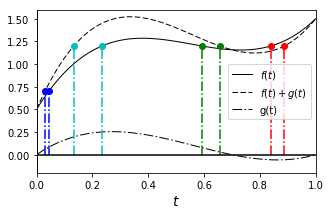

In [33]:
pylab.ion()
fig, ax = pylab.subplots()
plot_results(polynomial, 'k', lw=1, ls='-')
changes = np.array([1, -1.7, 0.7, 0])
changes = 3*changes
new_param = start_param + changes
plot_results(SignalPolynomial(new_param), 'k', lw=1, ls='--')
plot_results(SignalPolynomial( changes), 'k', lw=1, ls='-.')

one_point(new_param, sample_values[3], 'r', 0)
one_point(new_param, sample_values[2], 'g', 1)
one_point(new_param, sample_values[1], 'c', 2)
one_point(new_param, sample_values[0], 'b', 2)

one_point(start_param, sample_values[3], 'r', 0)
one_point(start_param, sample_values[2], 'g', 1)
one_point(start_param, sample_values[1], 'c', 2)
one_point(start_param, sample_values[0], 'b', 2)

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

pylab.legend(["$f(t)$", "$f(t) + g(t)$", "g(t)"], loc=5)
pylab.xlabel("$t$", fontsize=14)
pylab.ylim(-0.2,1.6)
pylab.xlim(0,1)

pylab.ioff()
pylab.show()

In [34]:
pylab.ion()



# one_point(start_param, sample_values[3], 'r', 0)
# one_point(start_param, sample_values[2], 'g', 1)
# one_point(start_param, sample_values[1], 'c', 2)
# one_point(start_param, sample_values[0], 'b', 2)
    
pylab.ioff()
pylab.show()

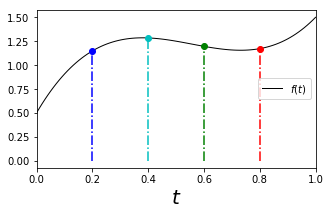

1.148
1.1944000000000068
-0.4407999999999408
-1.4352000000001297


/Users/miska/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


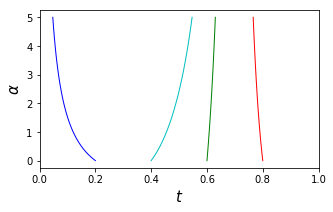

In [174]:
import itertools
from matplotlib import cm

pol = SignalPolynomial(start_param)
pylab.show()
alpha = np.linspace(0,5)
colors = itertools.cycle(["b", "c", "g", "r"])
grays = itertools.cycle(['0.0','0.1','0.2','0.3','0.4'])
sample_positions = [0.2,0.4,0.6,0.8]

pylab.ion()
plot_results(pol,color='k')
for s in sample_positions:
    stem_results([s],[pol.get_samples(s)],color=next(colors))
pylab.gcf().subplots_adjust(bottom=0.15)
# pylab.ylabel(r'$\alpha$',fontsize=20)
pylab.xlabel(r'$t$',fontsize=20)
pylab.xlim(0,1)

pylab.legend(["$f(t)$"], loc=5)
pylab.ioff()
pylab.show()

pylab.ion()
for s in sample_positions:
    print(pol.get_samples(s))
    p = pol.path(s,0.1*changes)
    pylab.plot(p,alpha,lw=1,color=next(colors))
pylab.gcf().subplots_adjust(bottom=0.15)
pylab.ylabel(r'$\alpha$',fontsize=15)
pylab.xlabel(r'$t$',fontsize=15)
pylab.xlim(0,1)

# pylab.legend(["sample 1", "sample 2", "sample 3", "sample 4"], loc=5)
pylab.ioff()
pylab.show()

/Users/miska/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/miska/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


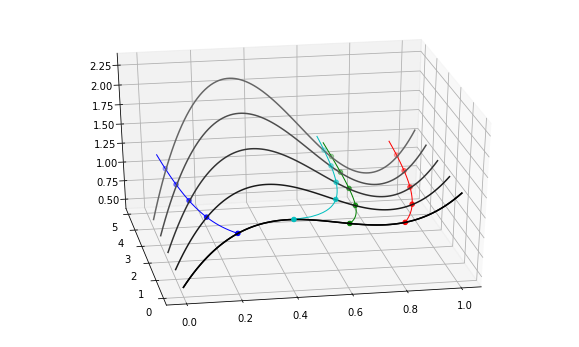

In [179]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111, projection='3d')
t = np.linspace(0, 1, 100)
pol = SignalPolynomial(start_param)
z = pol.get_samples(t)
ax.plot(t, np.zeros_like(t), z, 'k')
ax.legend()

sample_values = pol.get_samples(sample_positions)

for s,v in zip(sample_positions, sample_values):
    color = next(colors)
    pol = SignalPolynomial(start_param)
    p = pol.path(s,0.1*changes)
    ax.plot(p,alpha,v*np.ones_like(alpha),lw=1,color=color)
    ax.scatter(p[0::10],alpha[0::10],v*np.ones(5),lw=1,color=color)
    
for i in range(5):
    pol2 = SignalPolynomial(start_param+i*changes)
    z = pol2.get_samples(t)
    ax.plot(t, np.ones_like(t)*i, z,next(grays))

ax.view_init(30, -100)
plt.show()